### Stationarity Exercise

In [96]:
# import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import random
import random

# set a random seed
random.seed(5)

* generate a NON stationary time-series

In [137]:
# data = [random.randint(0, 100) for i in range(0, 10000)]

# seasonality
time = np.arange(1000)
values = np.where(time < 10, time**3, (time-9)**2)

seasonal = []
for i in range(10):
    for j in range(100):
        seasonal.append(values[j])
        
# noise
noise = np.random.randn(1000)*100
seasonal += noise

# trend
seasonal_upward = np.arange(1000)*(10 + seasonal)

# plot
time_seasonal = np.arange(1000)
periods = [pd.period_range('2022-01-01', periods=1000, freq='D')]

df = pd.DataFrame(time_seasonal * seasonal_upward, index=periods)

* plot the NON stationary series generated above

In [138]:
df

,0
2022-01-01,-0.000000e+00
2022-01-02,5.705969e+01
2022-01-03,6.122536e+02
2022-01-04,-2.881529e+02
2022-01-05,2.728869e+03
...,...
2024-09-22,7.323126e+09
2024-09-23,7.604265e+09
2024-09-24,7.688217e+09
2024-09-25,7.948028e+09


<Figure size 1080x720 with 0 Axes>

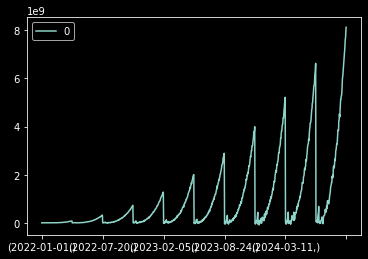

In [139]:
plt.figure(figsize=(15,10))
df.plot()
plt.show()

* generate a stationary time-series

In [140]:
data_norm = [random.normalvariate(10, 2) for i in range(0, 1000)]

df_norm = pd.DataFrame(data_norm, periods)

* plot the stationary series generated above

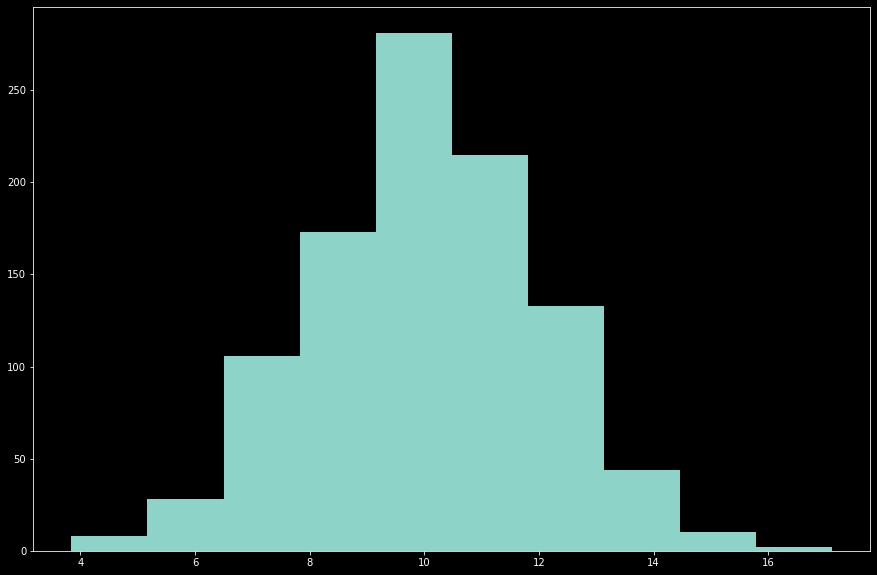

In [141]:
plt.figure(figsize=(15,10))
plt.hist(df_norm)
plt.show()

* Create a function `'ADF_Stationarity_Test'` with the input parameters `timeseries` and `significance_level` which: 
    * prints the adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [142]:
def adf_test(timeseries, sigfig:int):
    from statsmodels.tsa.stattools import adfuller
    
    result = adfuller(timeseries, regression='ctt')
    print(f't-stat: {np.round(result[0], sigfig)}')
    print(f'p-value: {np.round(result[1], sigfig)}')
    print(f'crit values:')
    for key,value in result[4].items():
        print(f'{key} : {value}')
        
    if result[1] > 0.05:
        print('The null hypothesis can be rejected. It is not stationary.')
    else:
        print('The null hypothesis cannot be rejected. It is stationary.')

* Apply the function `'ADF_Stationarity_Test'` to find out whether the timeseries generated above are stationary.

In [143]:
adf_test(df, 5)
adf_test(df_norm, 5)

t-stat: -3.62666
p-value: 0.08416
crit values:
1% : -4.382766025596549
5% : -3.8383142452686947
10% : -3.5569286306152224
The null hypothesis can be rejected. It is not stationary.
t-stat: -14.37898
p-value: 0.0
crit values:
1% : -4.382801184324198
5% : -3.838332127908256
10% : -3.5569396971160314
The null hypothesis cannot be rejected. It is stationary.


* Apply a suitable transformation to make the NON stationary time series stationary.

In [154]:
df_log = np.log(df)


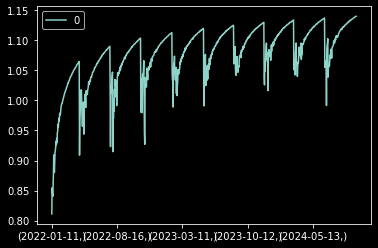

In [156]:
df_log.plot()
plt.show()

* plot the transformed time series

* Apply the function `'ADF_Stationarity_Test'` to find out whether the transformed timeseries is stationary.

In [157]:
adf_test(df_log, 5)

t-stat: -6.25502
p-value: 0.0
crit values:
1% : -4.383768617786584
5% : -3.8388241476483524
10% : -3.5572441612545718
The null hypothesis cannot be rejected. It is stationary.
